# Import different librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Import dataset

In [2]:
dataset = pd.read_csv(".././dataset/kc_house_data.csv")

In [3]:
#Visualise dataset
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
#visualise dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
dataset = dataset.drop(['id', 'date'], axis=1)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [7]:
#Here we are going to see the different correlation of the feature of dataset with our label price
correlation = dataset.corr()
correlation_with_price = correlation['price']
correlation_with_price

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [8]:
#Here we are going to see the feature of dataset which have the correlation inferior to 0.2 with our label price
df_corr = correlation_with_price[correlation_with_price<0.2]

In [9]:
df_corr

sqft_lot        0.089661
condition       0.036362
yr_built        0.054012
yr_renovated    0.126434
zipcode        -0.053203
long            0.021626
sqft_lot15      0.082447
Name: price, dtype: float64

In [10]:
#Now we drop this features 
dataset = dataset.drop(['sqft_lot', 'condition', 'yr_built','yr_renovated','zipcode', 'long', 'sqft_lot15'], axis=1)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21611 non-null  float64
 9   sqft_basement  21613 non-null  int64  
 10  lat            21613 non-null  float64
 11  sqft_living15  21613 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 2.0 MB


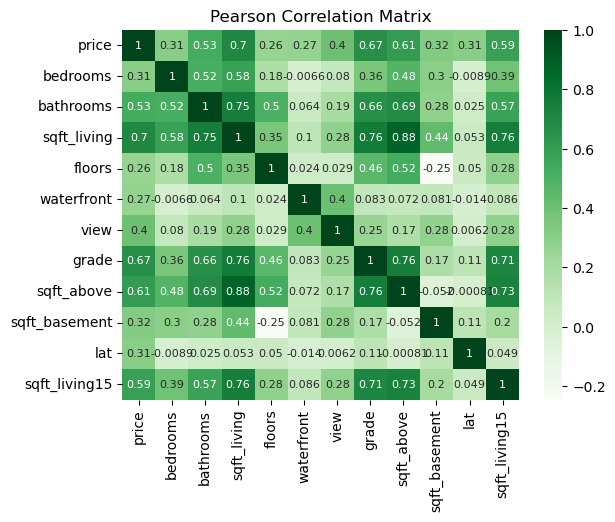

In [12]:
sns.heatmap(dataset.corr(), annot=True,cmap='Greens', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

In [13]:
dataset = dataset.drop(['sqft_above', 'sqft_living15'], axis=1)

In [14]:
dataset

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,221900.0,3,1.00,1180,1.0,0,0,7,0,47.5112
1,538000.0,3,2.25,2570,2.0,0,0,7,400,47.7210
2,180000.0,2,1.00,770,1.0,0,0,6,0,47.7379
3,604000.0,4,3.00,1960,1.0,0,0,7,910,47.5208
4,510000.0,3,2.00,1680,1.0,0,0,8,0,47.6168
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,0,47.6993
21609,400000.0,4,2.50,2310,2.0,0,0,8,0,47.5107
21610,402101.0,2,0.75,1020,2.0,0,0,7,0,47.5944
21611,400000.0,3,2.50,1600,2.0,0,0,8,0,47.5345


In [15]:
#preparing features
features = dataset.iloc[:,1:].values
#preparing target
target = dataset.iloc[:,0:1].values

In [16]:
features

array([[3.00000e+00, 1.00000e+00, 1.18000e+03, ..., 7.00000e+00,
        0.00000e+00, 4.75112e+01],
       [3.00000e+00, 2.25000e+00, 2.57000e+03, ..., 7.00000e+00,
        4.00000e+02, 4.77210e+01],
       [2.00000e+00, 1.00000e+00, 7.70000e+02, ..., 6.00000e+00,
        0.00000e+00, 4.77379e+01],
       ...,
       [2.00000e+00, 7.50000e-01, 1.02000e+03, ..., 7.00000e+00,
        0.00000e+00, 4.75944e+01],
       [3.00000e+00, 2.50000e+00, 1.60000e+03, ..., 8.00000e+00,
        0.00000e+00, 4.75345e+01],
       [2.00000e+00, 7.50000e-01, 1.02000e+03, ..., 7.00000e+00,
        0.00000e+00, 4.75941e+01]])

In [17]:
target

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [18]:
#shape
print(f"features shape {features.shape}")
print(f"target shape {target.shape}")

features shape (21613, 9)
target shape (21613, 1)


In [19]:
#Normalize features
X = (features - features.mean())/ (features.std())

In [20]:
print("******* Features normalized ******")
print(X)

******* Features normalized ******
[[-0.36640085 -0.36914104  1.24619997 ... -0.36092047 -0.37051113
  -0.30541631]
 [-0.36640085 -0.36742842  3.15063085 ... -0.36092047  0.17752653
  -0.30512887]
 [-0.36777094 -0.36914104  0.68446137 ... -0.36229057 -0.37051113
  -0.30510571]
 ...
 [-0.36777094 -0.36948356  1.02698491 ... -0.36092047 -0.37051113
  -0.30530232]
 [-0.36640085 -0.3670859   1.82163952 ... -0.35955038 -0.37051113
  -0.30538439]
 [-0.36777094 -0.36948356  1.02698491 ... -0.36092047 -0.37051113
  -0.30530273]]


# Regression Linéaire 

Répartition de notre features
X_train : features d'entrainement
X_test : features de test
y_train : features d'entrainement
y_test : features de test

In [21]:
#repartition de notre feature
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.3, random_state=101)

In [22]:
#create multiple linear regression model
model = LinearRegression()

In [23]:
#Train model
model.fit(X_train,y_train)

LinearRegression()

In [24]:
#Prediction 
predicted = model.predict(X_test)

In [25]:
predicted

array([[427618.49272591],
       [652357.2222355 ],
       [619775.99267149],
       ...,
       [695762.08222979],
       [160804.93931592],
       [957559.75562334]])

In [26]:
y_test

array([[ 349950.],
       [ 450000.],
       [ 635000.],
       ...,
       [ 394250.],
       [ 249500.],
       [1350000.]])

In [27]:
r2_score(y_test, predicted)

0.6694271882495151

In [28]:
model.intercept_

array([3.28558215e+08])

# Régression linéaire polynomiale

In [29]:
polynomials_features = PolynomialFeatures(degree=2,include_bias=True)

In [30]:
poly_converter = polynomials_features.fit_transform(X)

In [31]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(poly_converter, target, test_size=0.2, random_state=101)

In [32]:
model.fit(Xp_train, yp_train)

LinearRegression()

In [33]:
pred = model.predict(Xp_test)

In [34]:
pred

array([[368773.87109375],
       [621870.0390625 ],
       [607436.22070312],
       ...,
       [294563.47070312],
       [422846.4296875 ],
       [284917.171875  ]])

In [35]:
yp_test

array([[349950.],
       [450000.],
       [635000.],
       ...,
       [268750.],
       [433000.],
       [135000.]])

In [36]:
r2_score(yp_test, pred)

0.7608523163256997

Degree 3


In [37]:
polynomials_features_3 = PolynomialFeatures(degree=3,include_bias=True)

In [38]:
poly_converter_3 = polynomials_features_3.fit_transform(X)

In [39]:
Xp_train_3, Xp_test_3, yp_train_3, yp_test_3 = train_test_split(poly_converter, target, test_size=0.2, random_state=101)

In [40]:
model.fit(Xp_train_3, yp_train_3)

LinearRegression()

In [41]:
pred_3 = model.predict(Xp_test_3)

In [42]:
pred_3

array([[368773.87109375],
       [621870.0390625 ],
       [607436.22070312],
       ...,
       [294563.47070312],
       [422846.4296875 ],
       [284917.171875  ]])

In [43]:
yp_test_3

array([[349950.],
       [450000.],
       [635000.],
       ...,
       [268750.],
       [433000.],
       [135000.]])

In [44]:
r2_score(yp_test_3, pred_3)

0.7608523163256997